**Proyecto popularidad temas musicales**

**Librerias**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

**Cargar el dataset**

In [4]:
df = pd.read_csv('data.csv')
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Opera,Giuseppe Verdi,"Stiffelio, Act III: Ei fugge! … Lina, pensai c...",7EsKYeHtTc4H4xWiTqSVZA,21,0.986,0.313,490867,0.23100,0.000431,C#,0.0964,-14.287,Major,0.0547,86.001,4/4,0.0886
1,Opera,Giacomo Puccini,Madama Butterfly / Act 1: ... E soffitto e pareti,7MfmRBvqaW0I6UTxXnad8p,18,0.972,0.360,176797,0.20100,0.028000,D#,0.1330,-19.794,Major,0.0581,131.798,4/4,0.3690
2,Opera,Giacomo Puccini,"Turandot / Act 2: Gloria, gloria, o vincitore",7pBo1GDhIysyUMFXiDVoON,10,0.935,0.168,266184,0.47000,0.020400,C,0.3630,-8.415,Major,0.0383,75.126,3/4,0.0696
3,Opera,Giuseppe Verdi,"Rigoletto, Act IV: Venti scudi hai tu detto?",02mvYZX5aKNzdqEo6jF20m,17,0.961,0.250,288573,0.00605,0.000000,D,0.1200,-33.440,Major,0.0480,76.493,4/4,0.0380
4,Opera,Giuseppe Verdi,"Don Carlo / Act 4: ""Ella giammai m'amò!""",03TW0jwGMGhUabAjOpB1T9,19,0.985,0.142,629760,0.05800,0.146000,D,0.0969,-23.625,Major,0.0493,172.935,4/4,0.0382


**Verificació y limpieza de datos**


In [8]:
df.isnull().sum()

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

Eliminar Columna

In [9]:
df = df.drop(columns=['track_id'])

**Tipo de datos del dataframe**


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


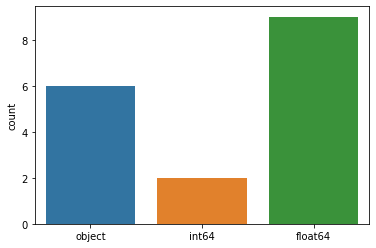

In [10]:
sns.countplot(df.dtypes.map(str))

**Hallar X, Y**

In [11]:
X = df.drop(columns='popularity')
y = df.popularity

**Dividir el dataset en training and testing**

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

**Transformar los datos**

In [13]:
# aprendamos primero la media del juego de trenes
means = X_train.mean(axis=0)
means

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


acousticness             0.350865
danceability             0.554169
duration_ms         236380.605127
energy                   0.581394
instrumentalness         0.137071
liveness                 0.214906
loudness                -9.349546
speechiness              0.122347
tempo                  117.436390
valence                  0.445256
dtype: float64

In [16]:
#Tipo de datos
df.dtypes

genre                object
artist_name          object
track_name           object
popularity            int64
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo               float64
time_signature       object
valence             float64
dtype: object

In [20]:
# Se eliminan las columnas no númericas
X_train_scaled = X_train.drop(columns=['genre','artist_name','track_name','mode','time_signature', 'key'])

X_train_scaled

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
69063,0.22800,0.919,205803,0.622,0.000004,0.1220,-7.384,0.0997,140.022,0.424
207292,0.78900,0.323,177840,0.258,0.000052,0.1130,-9.029,0.0294,140.122,0.211
136331,0.00911,0.483,225653,0.879,0.000209,0.1970,-3.758,0.0484,79.889,0.406
73051,0.96900,0.437,221711,0.282,0.001740,0.1150,-17.455,0.0481,143.934,0.163
200323,0.02210,0.520,246533,0.921,0.000000,0.7970,-4.613,0.0688,94.966,0.416
...,...,...,...,...,...,...,...,...,...,...
119879,0.88100,0.455,168160,0.242,0.000000,0.8620,-26.169,0.9530,84.067,0.430
103694,0.00363,0.727,120520,0.701,0.000000,0.2070,-5.929,0.0417,119.928,0.444
131932,0.01790,0.558,184573,0.639,0.150000,0.0824,-7.456,0.0290,125.990,0.507
146867,0.03040,0.679,301273,0.715,0.887000,0.0900,-8.313,0.0489,123.047,0.348


In [21]:
# aprendamos ahora los valores mínimo y máximo, y el rango de valores 
ranges = X_train_scaled.max(axis=0)-X_train_scaled.min(axis=0)
ranges

acousticness        9.959990e-01
danceability        9.301000e-01
duration_ms         5.537408e+06
energy              9.989797e-01
instrumentalness    9.990000e-01
liveness            9.895000e-01
loudness            4.925400e+01
speechiness         9.448000e-01
tempo               2.088150e+02
valence             1.000000e+00
dtype: float64

In [22]:
#ahora estamos listos para realizar la normalización de la media
X_train_scaled = (X_train - means) / ranges
X_test_scaled = (X_test - means) / ranges

In [23]:
np.round(X_train.describe(), 1)

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,182527.0,182527.0,182527.0,182527.0,182527.0,182527.0,182527.0,182527.0,182527.0,182527.0
mean,0.4,0.6,236380.6,0.6,0.1,0.2,-9.3,0.1,117.4,0.4
std,0.4,0.2,115625.0,0.3,0.3,0.2,5.9,0.2,30.7,0.3
min,0.0,0.1,15509.0,0.0,0.0,0.0,-47.7,0.0,31.0,0.0
25%,0.0,0.4,186135.0,0.4,0.0,0.1,-11.3,0.0,92.8,0.2
50%,0.2,0.6,221137.0,0.6,0.0,0.1,-7.5,0.1,115.3,0.4
75%,0.7,0.7,264677.0,0.8,0.0,0.3,-5.4,0.1,138.9,0.6
max,1.0,1.0,5552917.0,1.0,1.0,1.0,1.6,1.0,239.8,1.0


In [25]:
#Datos despues de la normalización
np.round(X_train_scaled.describe(), 1)

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,182527.0,182527.0,182527.0,182527.0,182527.0,182527.0,182527.0,182527.0,182527.0,182527.0
mean,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0
std,0.4,0.2,0.0,0.3,0.3,0.2,0.1,0.2,0.1,0.3
min,-0.4,-0.5,-0.0,-0.6,-0.1,-0.2,-0.8,-0.1,-0.4,-0.4
25%,-0.3,-0.1,-0.0,-0.2,-0.1,-0.1,-0.0,-0.1,-0.1,-0.2
50%,-0.1,0.0,-0.0,0.0,-0.1,-0.1,0.0,-0.1,-0.0,-0.0
75%,0.3,0.1,0.0,0.2,-0.1,0.0,0.1,-0.0,0.1,0.2
max,0.6,0.5,1.0,0.4,0.9,0.8,0.2,0.9,0.6,0.6


**Seleccion de Caracteristicas**

Mapa de calor, el cual indica cómo se relacionan las características entre sí o con la variable de destino

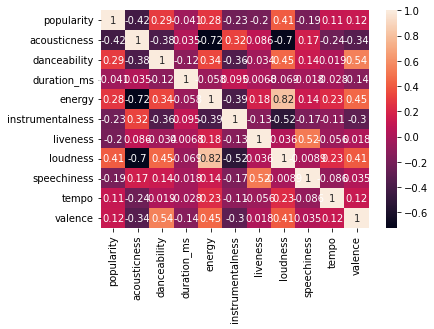

In [27]:
sns.heatmap(df.corr(), annot=True)

In [28]:
#La media de aprobación de los nombres de la música
mean_popularity = pd.DataFrame(df.groupby('track_name')['popularity'].mean())
mean_popularity.head(10)

,popularity
track_name,
""" La Traviata "" : Amami Alfredo (Act II) - Digitally Remastered",31.0
"""42"" - From SR3MM",53.0
"""45""",48.0
"""99""",69.0
"""A Far Green Country""",40.5
"""A wooden ring"" [Act Two]",11.0
"""A""--You're Adorable (The Alphabet Song)",11.0
"""Ah mes amis - Pour mon âme""",27.0
"""Ah, Violetta!"" ""Voi? Signor?""",4.0
